In [1]:
from utils import *

pd.set_option("display.notebook_repr_html", False) 

In [2]:
buddyzm = Religion('../buddyzm')
islam = Religion('../islam')
judaism = Religion('../judaizm')

# "Użytkownicy forum dotyczącego której z trzech religii: buddyzmu, islamu czy judaizmu okazują się być najmniej uprzejmi?". 

Sprawdzimy to na podstawie ich reputacji, ilości głosów przeciwko dla użytkowników oraz ilości postów na każdym forum, które zostały oflagowane jako ofensywne.

## Reputacja

Policzymy tu procentowy udział użytkowników z najniższą reputacją dla każdej religii oraz średnią reputację użytkownika każdego forum.

In [3]:
def min_reputation(religion):
    """ Ta prosta funkcja wyciąga z ramki Users kolumny Reputation i Id, gdzie Id nie jest równe -1 i sortuje je rosnąco
    po Reputation. Następnie tworzona jest kolumna MinReputation, zawierająca najmniejszą wartość Reputation. Wybieramy te
    rekordy, dla których Reputation = MinReputation """
    UserReputation = religion.Users[['Id', 'Reputation']].copy()
    UserReputationSorted = UserReputation.sort_values(by = 'Reputation', ascending = True)
    UserReputationSorted = UserReputationSorted[UserReputationSorted['Id'] != '-1']
    # trzeba stworzyć kolumnę MinReputation i wybrać te rekordy dla których 'Reputation' = 'MinReputation'
    UserReputationSorted = UserReputationSorted.assign(MinReputation = (UserReputationSorted.min()['Reputation'])).astype(int)
    UserReputationSorted = UserReputationSorted[UserReputationSorted['Reputation'] == UserReputationSorted['MinReputation']]
    return UserReputationSorted

In [4]:
bUserReputation = min_reputation(buddyzm)
iUserReputation = min_reputation(islam)
jUserReputation = min_reputation(judaism)

In [119]:
bUserReputation

         Id  Reputation  MinReputation
7413  13452           1              1
7414  13454           1              1
7415  13455           1              1
7416  13456           1              1
7417  13457           1              1
...     ...         ...            ...
509     595           1              1
4079   9822           1              1
121     146           1              1
946    2112           1              1
820     969           1              1

[6433 rows x 3 columns]

In [114]:
iUserReputation

          Id  Reputation  MinReputation
17277  29327           1              1
17275  29325           1              1
17274  29324           1              1
17273  29323           1              1
17272  29322           1              1
...      ...         ...            ...
9519   20993           1              1
11904  23480           1              1
9513   20987           1              1
9612   21097           1              1
9617   21102           1              1

[17220 rows x 3 columns]

In [115]:
jUserReputation

         Id  Reputation  MinReputation
9053  16665           1              1
9054  16666           1              1
9056  16668           1              1
9059  16671           1              1
9061  16673           1              1
...     ...         ...            ...
662    1053           1              1
2089   3089           1              1
5478  12260           1              1
2081   3076           1              1
5477  12259           1              1

[6592 rows x 3 columns]

In [5]:
def count_min_reputation_percentage(religion):
    """ Zliczamy ile jest użytkowników z najniższą reputacją dla każdej z religii i sprawdzamy, jak wypada to procentowo
    w stosunku do wszystkich użytkowników danej religii """
    index = min_reputation(religion).index
    rowNumber = len(index)

    dfUsers = religion.Users
    dfUsers = dfUsers[dfUsers['Id'] != '-1']
    totalIndex = dfUsers.index
    totalRowNumber = len(totalIndex)
    
    minReputationPercentage = rowNumber/totalRowNumber

    return minReputationPercentage

In [6]:
bMinReputationPercentage = count_min_reputation_percentage(buddyzm)
iMinReputationPercentage = count_min_reputation_percentage(islam)
jMinReputationPercentage = count_min_reputation_percentage(judaism)

In [7]:
bMinReputationPercentage

0.5174133354781629

In [8]:
jMinReputationPercentage

0.441231593038822

In [9]:
iMinReputationPercentage

0.632065775950668

Zliczyliśmy, jaki procent użytkowników każdego z 3 forów posiada najniższą możliwą reputację. Zobrazujmy to na wykresie. Najpierw jednak stwórzmy odpowiednią ramkę danych.

In [13]:
data = [['buddyzm', bMinReputationPercentage * 100], ['judaizm', jMinReputationPercentage * 100], ['islam', iMinReputationPercentage * 100]]
df = pd.DataFrame(data, columns = ['Religion', 'Min Reputation %'])
df

  Religion  Min Reputation %
0  buddyzm         51.741334
1  judaizm         44.123159
2    islam         63.206578

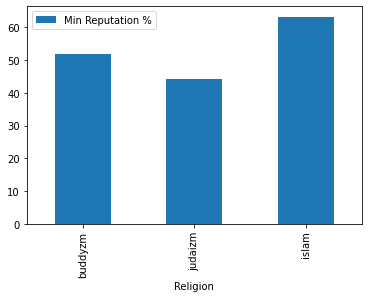

In [14]:
import matplotlib.pyplot as plt

df.plot(x = "Religion", y = "Min Reputation %", kind = 'bar')
plt.show()

Udział procentowy użytkowników z najniższą reputacją jest najwyższy dla **islamu**. Sprawdźmy, jak dla każdej religii wypada średnia reputacja.

In [15]:
def mean_reputation(religion):
    """ Ta prosta funkcja wyciąga z ramki Users kolumny Reputation i Id, gdzie Id nie jest równe -1.
    Następnie wyliczana jest średnia wartość kolumny Reputation """
    UserReputation = religion.Users[['Id', 'Reputation']].copy()
    UserReputation = UserReputation[UserReputation['Id'] != '-1']
    meanReputation = UserReputation['Reputation'].astype(float).mean()
    return meanReputation

In [16]:
mean_reputation(islam)

45.98528116282484

In [17]:
mean_reputation(buddyzm)

90.25335799887397

In [18]:
mean_reputation(judaism)

252.98078982597056

In [19]:
mean_data = [['buddyzm', mean_reputation(buddyzm)], ['judaizm', mean_reputation(judaism)], ['islam', mean_reputation(islam)]]
mean_df = pd.DataFrame(mean_data, columns = ['Religion', 'Mean Reputation'])
mean_df

  Religion  Mean Reputation
0  buddyzm        90.253358
1  judaizm       252.980790
2    islam        45.985281

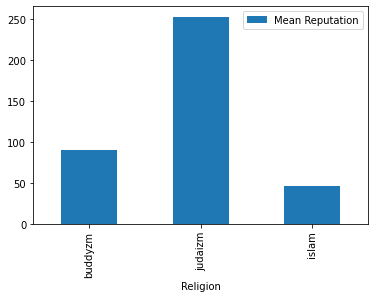

In [20]:
import matplotlib.pyplot as plt

mean_df.plot(x = "Religion", y = "Mean Reputation", kind = 'bar')
plt.show()

Po wyliczeniu średniej reputacji dostajemy potwierdzenie - użytkownicy forum nt **islamu** wypadają najgorzej, jeśli chodzi o reputację. Sprawdźmy teraz ilość głosów przeciwko dla użytkowników każdego forum.

## DownVotes

Policzymy maksymalną liczbę głosów przeciwko jaką dostał użytkownik danego forum oraz średnią dla każdego użytkownika.

In [38]:
def user_downvotes(religion):
    dfUsers = religion.Users.copy()
    dfUsers = dfUsers[dfUsers['Id'] != '-1']
    dfUsers = dfUsers['DownVotes'].astype(int)
    dfUsers = dfUsers.sort_values(ascending = False)
    return dfUsers

In [42]:
def max_user_downvotes(religion):
    return user_downvotes(religion).max()

In [44]:
def mean_user_downvotes(religion):
    return user_downvotes(religion).mean()

In [48]:
max_downvotes_data = [['buddyzm', max_user_downvotes(buddyzm)], ['judaizm', max_user_downvotes(judaism)], ['islam', max_user_downvotes(islam)]]
max_downvotes = pd.DataFrame(max_downvotes_data, columns = ['Religion', 'Max DownVotes'])
max_downvotes

  Religion  Max DownVotes
0  buddyzm           1941
1  judaizm           9457
2    islam          11103

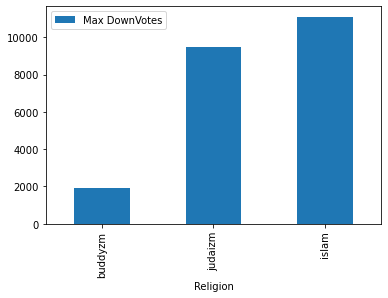

In [51]:
import matplotlib.pyplot as plt

max_downvotes.plot(x = "Religion", y = "Max DownVotes", kind = 'bar')
plt.show()

Widzimy, że maksymalna ilość głosów przeciwko dla jednego użytkownika jest największa dla **islamu**. Duży kontrast jest między **buddyzmem** a pozostałymi religiami.

In [52]:
mean_downvotes_data = [['buddyzm', mean_user_downvotes(buddyzm)], ['judaizm', mean_user_downvotes(judaism)], ['islam', mean_user_downvotes(islam)]]
mean_downvotes = pd.DataFrame(mean_downvotes_data, columns = ['Religion', 'Mean DownVotes'])
mean_downvotes

  Religion  Mean DownVotes
0  buddyzm        0.533982
1  judaizm        2.802008
2    islam        1.173910

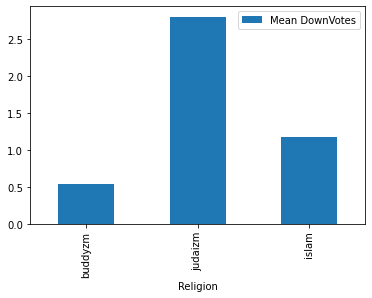

In [53]:
import matplotlib.pyplot as plt

mean_downvotes.plot(x = "Religion", y = "Mean DownVotes", kind = 'bar')
plt.show()

Więcej oddaje jednak wyliczenie średniej dla użytkownika danego forum z głosów przeciwko. Tutaj forum judaizmu ponad dwukrotnie przebija islam. Sprawdźmy, jak wygląda sytuacja dla ilości postów oflagowanych jako ofensywne.

## Posty oflagowane jako ofensywne

In [57]:
def offensive_flags(religion):
    dfVotes = religion.Votes.copy()
    dfVotes = dfVotes[dfVotes['VoteTypeId'] == '4']
    dfVotes = dfVotes['VoteTypeId']
    return dfVotes

In [58]:
offensive_flags(buddyzm)

5414     4
37977    4
41880    4
43222    4
43226    4
43229    4
49899    4
52942    4
60912    4
61048    4
65408    4
65411    4
67205    4
70341    4
70349    4
84103    4
84142    4
85577    4
Name: VoteTypeId, dtype: object

In [155]:
offensive_flags(islam)

       PostId VoteTypeId
8192     2364          4
12251    4264          4
12474     944          4
13331    5553          4
14873    5885          4
...       ...        ...
148198  65164          4
148202  65165          4
148206  65166          4
148723  65385          4
148759  65422          4

[765 rows x 2 columns]

In [156]:
offensive_flags(judaism)

        PostId VoteTypeId
7207      3506          4
12527     5535          4
82879    18860          4
96140    25636          4
98284    26157          4
...        ...        ...
431834  117527          4
434044  118110          4
439874  119550          4
441496  119899          4
441742  119948          4

[294 rows x 2 columns]

In [60]:
def offensive_flags_post_count(religion):
    rowNumber = len(offensive_flags(religion).index)
    totalrowNumber = len((religion.Votes).index)
    return rowNumber/totalrowNumber

In [158]:
offensive_flags_post_count(buddyzm)

0.0001882333256645682

In [160]:
offensive_flags_post_count(judaism)

0.0006612373234732502

In [161]:
offensive_flags_post_count(islam)

0.005137607285328605

Policzyliśmy udział procentowy postów oflagowanych jako ofensywne dla każdego forum. Zobrazujmy to wykresem.

In [61]:
offensive_flags_data = [['buddyzm', offensive_flags_post_count(buddyzm) * 100], ['judaizm', offensive_flags_post_count(judaism) * 100], ['islam', offensive_flags_post_count(islam) * 100]]
offensive_flags = pd.DataFrame(offensive_flags_data, columns = ['Religion', 'Offensive Flags %'])
offensive_flags

  Religion  Offensive Flags %
0  buddyzm           0.018823
1  judaizm           0.066124
2    islam           0.513761

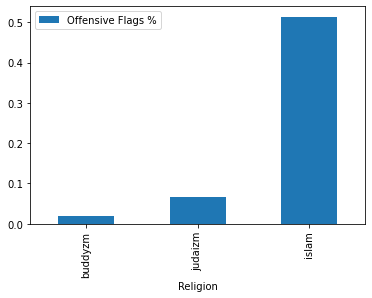

In [62]:
import matplotlib.pyplot as plt

offensive_flags.plot(x = "Religion", y = "Offensive Flags %", kind = 'bar')
plt.show()

W tej kategorii znów zdecydowanie przeważa forum dotyczące **islamu**.

# Podsumujmy wyniki

Mieliśmy następujące kategorie oceny tego, jak uprzejmi są użytkownicy danego forum:

1. Procent użytkowników z możliwą najniższą reputacją na każdym z 3 forów.
2. Średnia reputacja użytkowników.
3. Maksymalna liczba głosów przeciwko jakie otrzymał użytkownik danego forum.
4. Średnia liczba głosów przeciwko dla użytkownika danego forum.
5. Procentowy udział postów oflagowanych jako ofensywne dla każdego z 3 forów.

Żeby to zobrazować, w każdej kategorii zwycięzcy (w byciu najmniej uprzejmym) dajemy 1 punkt, reszcie 0.

1. **buddyzm** - 0, **judaizm** - 0, **islam** - 1
2. **buddyzm** - 0, **judaizm** - 0, **islam** - 1
3. **buddyzm** - 0, **judaizm** - 0, **islam** - 1
4. **buddyzm** - 0, **judaizm** - 1, **islam** - 0
5. **buddyzm** - 0, **judaizm** - 0, **islam** - 1

Narysujemy wykres kołowy jako interpretację tych wyników.

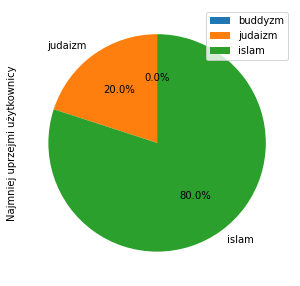

In [64]:
import matplotlib.pyplot as plt

religie = {'Najmniej uprzejmi użytkownicy': [0, 1, 4]}
religie_df = pd.DataFrame(religie, columns = ['Najmniej uprzejmi użytkownicy'], index = ['buddyzm', 'judaizm', 'islam'])
religie_df.plot.pie(y='Najmniej uprzejmi użytkownicy',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

Naszym ostatecznym zwycięzcą jest **islam**. Najbardziej uprzejmi użytkownicy są na forum **buddyzmu**. Taki przeciwny do poprzedniego wykres wygląda następująco:

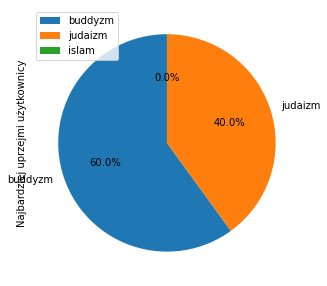

In [65]:
import matplotlib.pyplot as plt

religie = {'Najbardziej uprzejmi użytkownicy': [3, 2, 0]}
religie_df = pd.DataFrame(religie, columns = ['Najbardziej uprzejmi użytkownicy'], index = ['buddyzm', 'judaizm', 'islam'])
religie_df.plot.pie(y='Najbardziej uprzejmi użytkownicy',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()